In [1]:
#Load the Data
import pandas as pd

df = pd.read_csv("../data/processed_reviews.csv")  
df.head()

,review,rating,date,bank,source
0,really am happy to this app it is Siple to use...,5,2025-06-07,Commercial Bank of Ethiopia,Google Play
1,I liked this app. But the User interface is ve...,2,2025-06-07,Commercial Bank of Ethiopia,Google Play
2,"""Why don’t your ATMs support account-to-accoun...",4,2025-06-06,Commercial Bank of Ethiopia,Google Play
3,what is this app problem???,1,2025-06-05,Commercial Bank of Ethiopia,Google Play
4,the app is proactive and a good connections.,5,2025-06-05,Commercial Bank of Ethiopia,Google Play


In [2]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
import matplotlib.pyplot as plt
import seaborn as sns

nltk.download('stopwords')
# Initialize VADER
analyzer = SentimentIntensityAnalyzer()

# VADER sentiment scores
df['vader_compound'] = df['review'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

# TextBlob polarity
df['textblob_polarity'] = df['review'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Classify sentiment based on VADER compound score
def classify_sentiment(score):
    if score >= 0.05:
        return 'positive'
    elif score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

df['sentiment'] = df['vader_compound'].apply(classify_sentiment)

print(df['sentiment'].value_counts())

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\fre\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


sentiment
positive    611
neutral     347
negative    178
Name: count, dtype: int64


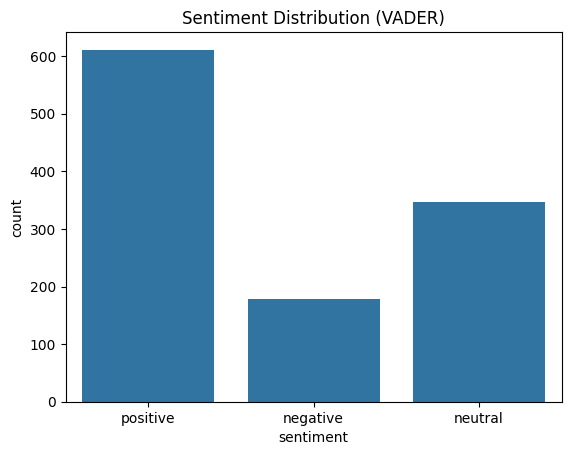

In [3]:
sns.countplot(data=df, x='sentiment')
plt.title('Sentiment Distribution (VADER)')
plt.show()

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

# Use TF-IDF Vectorizer on review content
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(df['review'])  # <-- assign this

# Use NMF for topic modeling
nmf = NMF(n_components=5, random_state=42)
nmf.fit(tfidf)

# Display top keywords per topic
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx}: ", end='')
        print(" + ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
display_topics(nmf, tfidf_feature_names, 7)

Topic 0: app + worst + banking + amazing + mobile + work + great
Topic 1: good + application + work + job + bad + need + service
Topic 2: best + banking + application + mobile + seen + loved + finance
Topic 3: easy + bank + use + dashen + fast + super + simple
Topic 4: nice + apps + service + application + bank + wish + aplication


In [5]:
topic_values = nmf.transform(tfidf)
df['dominant_topic'] = topic_values.argmax(axis=1)
df[['review', 'dominant_topic']].head(10)

,review,dominant_topic
0,really am happy to this app it is Siple to use...,3
1,I liked this app. But the User interface is ve...,0
2,"""Why don’t your ATMs support account-to-accoun...",3
3,what is this app problem???,0
4,the app is proactive and a good connections.,1
5,I cannot send to cbebirr app. through this app.,0
6,good,1
7,not functional,0
8,everytime you uninstall the app you have to re...,0
9,አካውንት የምናስገባበት ቦታ ስም ጽፈን ነው ከዚህ በፊት የላክንባቸውን አ...,4


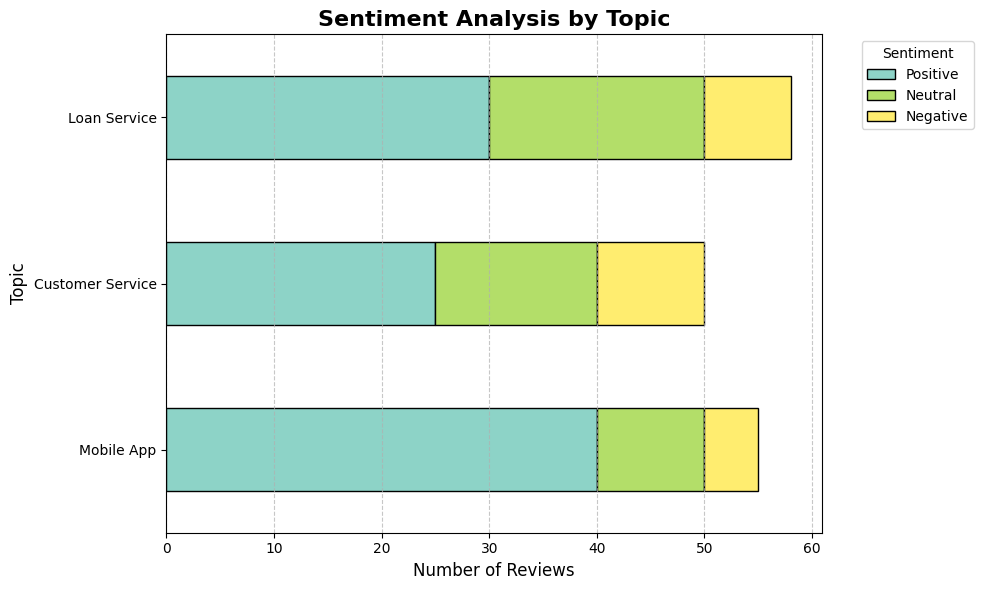

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Create sample data (replace this with your actual sentiment-topic DataFrame)
data = {
    'Positive': [40, 25, 30],
    'Neutral': [10, 15, 20],
    'Negative': [5, 10, 8]
}
topics = ['Mobile App', 'Customer Service', 'Loan Service']

# Create DataFrame
sentiment_topic = pd.DataFrame(data, index=topics)

# Plot
sentiment_topic.plot(kind='barh', stacked=True, figsize=(10, 6), colormap='Set3', edgecolor='black')

plt.title('Sentiment Analysis by Topic', fontsize=16, fontweight='bold')
plt.xlabel('Number of Reviews', fontsize=12)
plt.ylabel('Topic', fontsize=12)
plt.legend(title='Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



                bank  rating  sentiment_score
0  Bank of Abyssinia       1         0.972914
1  Bank of Abyssinia       2         0.931700
2  Bank of Abyssinia       3         0.950446
3  Bank of Abyssinia       4         0.955532
4  Bank of Abyssinia       5         0.939803


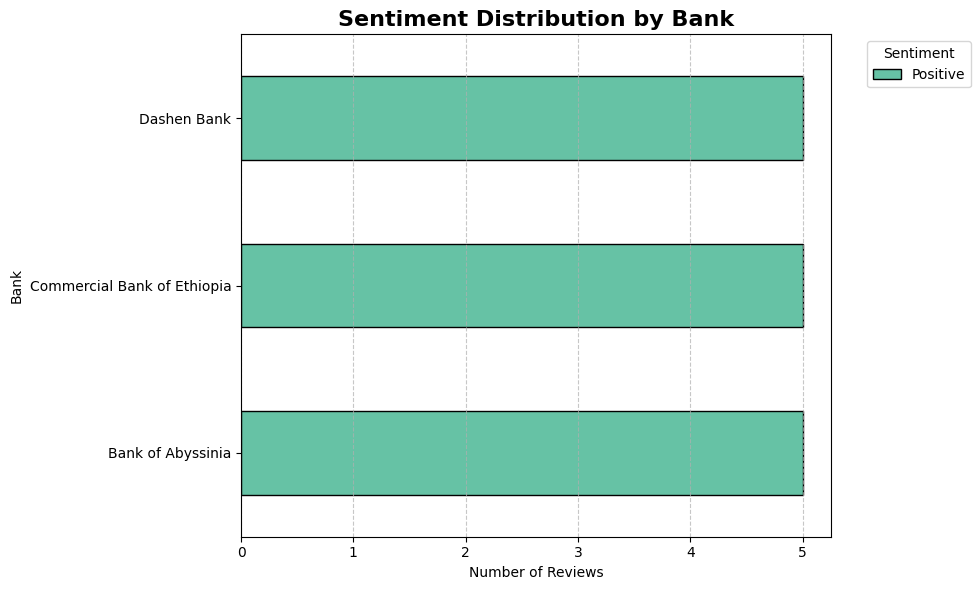

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load your data
df = pd.read_csv("../data/sentiment_aggregate_by_bank_rating.csv")

# Step 2: Optional - Inspect data
print(df.head())

# Step 3: Classify sentiment from sentiment_score
def classify_sentiment(score):
    if score > 0.1:
        return 'Positive'
    elif score < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment_label'] = df['sentiment_score'].apply(classify_sentiment)

# Step 4: Group by bank and sentiment label
sentiment_by_bank = df.groupby(['bank', 'sentiment_label']).size().unstack(fill_value=0)

# Step 5: Plot the result
sentiment_by_bank.plot(kind='barh', stacked=True, figsize=(10, 6), colormap='Set2', edgecolor='black')

plt.title('Sentiment Distribution by Bank', fontsize=16, fontweight='bold')
plt.xlabel('Number of Reviews')
plt.ylabel('Bank')
plt.legend(title='Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [8]:
print(df.columns)


Index(['bank', 'rating', 'sentiment_score', 'sentiment_label'], dtype='object')


                bank  rating  mean_sentiment  review_count
0  Bank of Abyssinia       1        0.972914             1
1  Bank of Abyssinia       2        0.931700             1
2  Bank of Abyssinia       3        0.950446             1
3  Bank of Abyssinia       4        0.955532             1
4  Bank of Abyssinia       5        0.939803             1


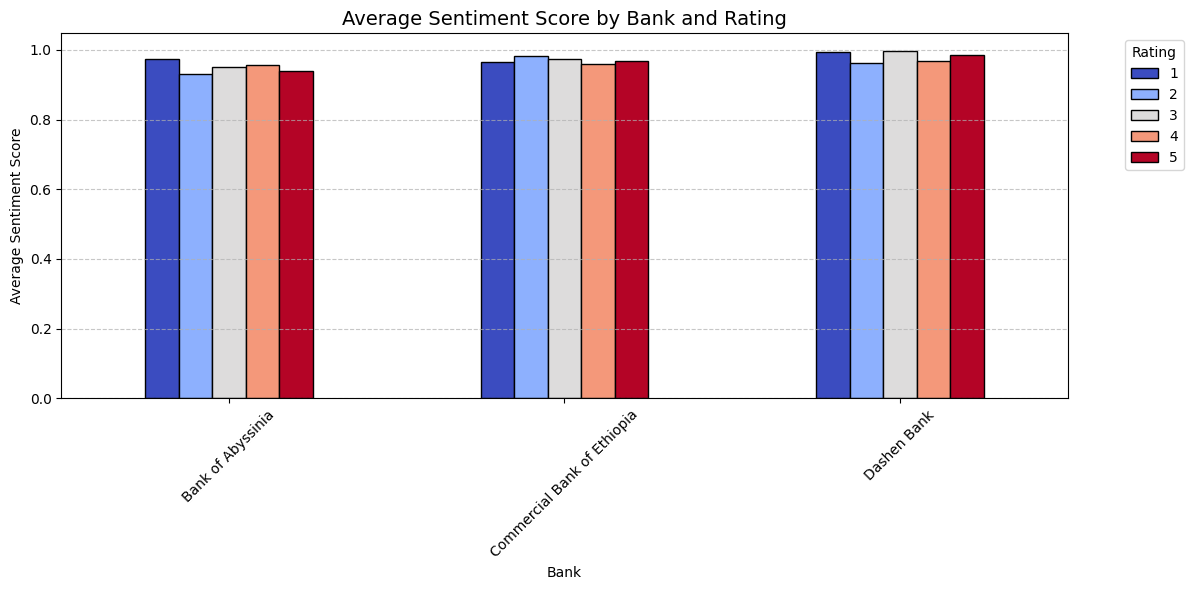

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the data
df = pd.read_csv("../data/sentiment_aggregate_by_bank_rating.csv")

# Step 2: Define sentiment classification function
def classify_sentiment(score):
    if score > 0.1:
        return 'Positive'
    elif score < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

# Step 3: Apply sentiment classification
df['sentiment'] = df['sentiment_score'].apply(classify_sentiment)

# Step 4: Aggregate mean sentiment score and count by bank and rating
agg = df.groupby(['bank', 'rating']).agg(
    mean_sentiment=('sentiment_score', 'mean'),
    review_count=('sentiment_score', 'count')
).reset_index()

print(agg.head())

# Step 5: Optional Visualization - Mean Sentiment Score by Bank and Rating
pivot_table = agg.pivot(index='bank', columns='rating', values='mean_sentiment')

# Plot
pivot_table.plot(kind='bar', figsize=(12, 6), cmap='coolwarm', edgecolor='black')

plt.title('Average Sentiment Score by Bank and Rating', fontsize=14)
plt.xlabel('Bank')
plt.ylabel('Average Sentiment Score')
plt.xticks(rotation=45)
plt.legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [10]:
from textblob import TextBlob
import pandas as pd

# Load data
df = pd.read_csv('../data/processed_reviews.csv')

# Define sentiment function using TextBlob
def textblob_sentiment(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    if polarity > 0.1:
        return 'positive', polarity
    elif polarity < -0.1:
        return 'negative', polarity
    else:
        return 'neutral', polarity

# Apply sentiment analysis
df[['tb_label', 'tb_polarity']] = df['review'].apply(lambda x: pd.Series(textblob_sentiment(x)))

# Aggregate mean polarity score and review count by bank and rating
agg = df.groupby(['bank', 'rating']).agg(
    mean_polarity=('tb_polarity', 'mean'),
    count=('review', 'count')
).reset_index()

print(agg)


                           bank  rating  mean_polarity  count
0             Bank of Abyssinia       1      -0.119162    210
1             Bank of Abyssinia       2       0.000889     15
2             Bank of Abyssinia       3       0.085515     30
3             Bank of Abyssinia       4       0.160887     11
4             Bank of Abyssinia       5       0.256363    123
5   Commercial Bank of Ethiopia       1      -0.023391     50
6   Commercial Bank of Ethiopia       2       0.033622     16
7   Commercial Bank of Ethiopia       3       0.118748     26
8   Commercial Bank of Ethiopia       4       0.347727     44
9   Commercial Bank of Ethiopia       5       0.415703    240
10                  Dashen Bank       1       0.000821     33
11                  Dashen Bank       2       0.006265     18
12                  Dashen Bank       3       0.229630     12
13                  Dashen Bank       4       0.254284     18
14                  Dashen Bank       5       0.392863    290


In [11]:
import pandas as pd
from collections import Counter
import nltk
from nltk.corpus import stopwords
import string
# Download NLTK stopwords if not already downloaded
nltk.download('stopwords')

# Define stopwords and punctuation
stop_words = set(stopwords.words('english'))
punctuation = set(string.punctuation)

# Preprocessing and keyword extraction function
def extract_keywords(text):
    words = text.lower().split()
    words = [word.strip(string.punctuation) for word in words]
    keywords = [word for word in words if word not in stop_words and word not in punctuation and word.isalpha()]
    return keywords

# Apply preprocessing
df['keywords'] = df['review'].apply(extract_keywords)

# Group by bank and get top keywords
top_keywords_per_bank = {}

for bank, group in df.groupby('bank'):
    all_keywords = [word for keywords in group['keywords'] for word in keywords]
    most_common = Counter(all_keywords).most_common(10)  # Top 10 keywords
    top_keywords_per_bank[bank] = most_common

# Print the results
for bank, keywords in top_keywords_per_bank.items():
    print(f"\nTop keywords for {bank}:")
    for word, freq in keywords:
        print(f"{word}: {freq}")


Top keywords for Bank of Abyssinia:
app: 196
bank: 51
work: 37
banking: 35
please: 33
mobile: 31
developer: 30
worst: 29
use: 29
boa: 28

Top keywords for Commercial Bank of Ethiopia:
app: 122
good: 57
cbe: 31
best: 28
bank: 26
nice: 23
banking: 22
application: 21
like: 19
screenshot: 19

Top keywords for Dashen Bank:
app: 208
dashen: 102
bank: 75
super: 74
banking: 72
one: 56
use: 44
fast: 41
best: 41
easy: 38


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\fre\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv("../data/thematic_analysis_output.csv")

# --- Step 1: Sentiment Scoring ---
def get_sentiment(text):
    polarity = TextBlob(str(text)).sentiment.polarity
    if polarity > 0.1:
        return 'Positive'
    elif polarity < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment'] = df['review'].apply(get_sentiment)

# Convert date to datetime for time-based analysis
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['month'] = df['date'].dt.to_period('M')

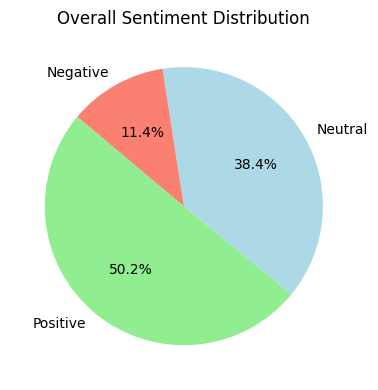

In [13]:
# --- Scenario 1: Overall Sentiment Distribution ---
plt.figure(figsize=(6,4))
df['sentiment'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['lightgreen', 'lightblue', 'salmon'])
plt.title("Overall Sentiment Distribution")
plt.ylabel('')
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

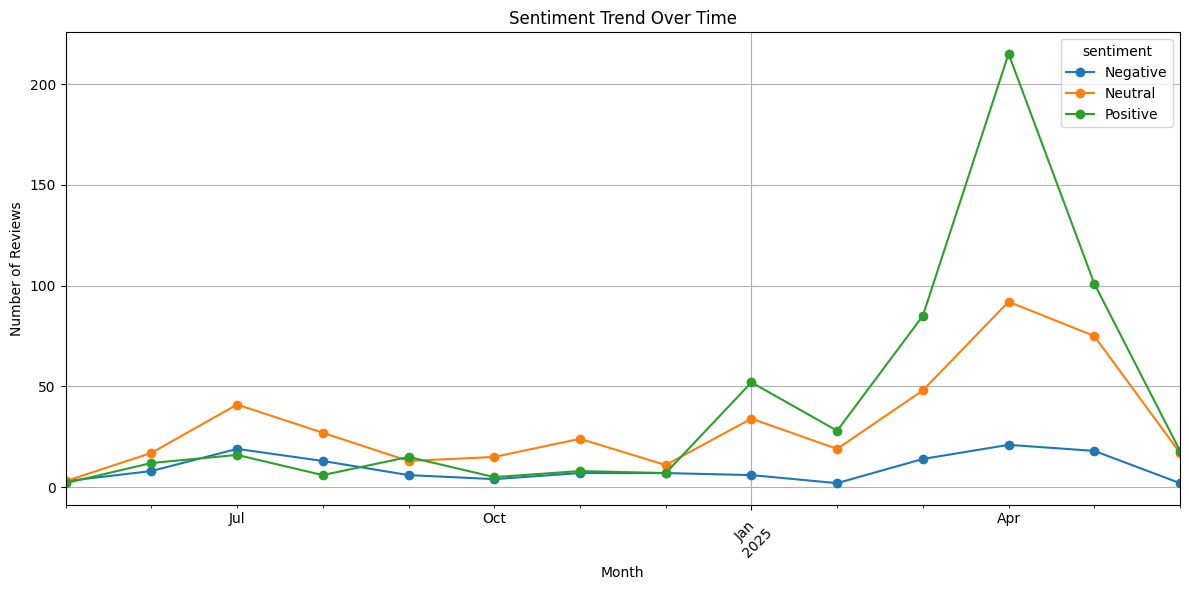

In [14]:
# --- Scenario 2: Sentiment Trend Over Time ---
plt.figure(figsize=(12,6))
sentiment_over_time = df.groupby(['month', 'sentiment']).size().unstack(fill_value=0)
sentiment_over_time.plot(kind='line', marker='o', figsize=(12,6))
plt.title("Sentiment Trend Over Time")
plt.xlabel("Month")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

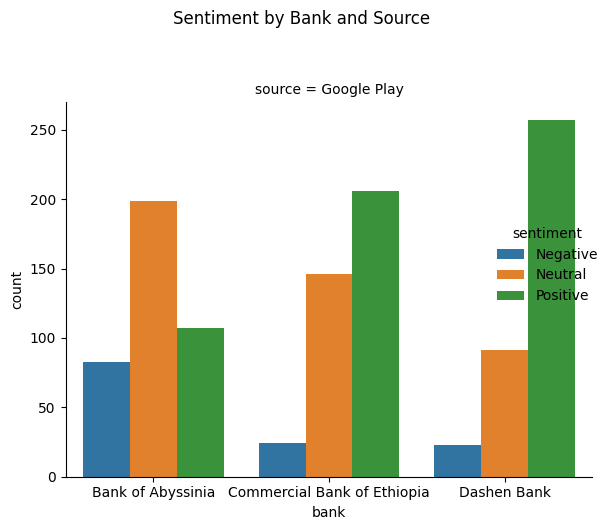

In [15]:
# --- Scenario 3: Sentiment by Bank and Source ---
plt.figure(figsize=(12,6))
bank_source_sentiment = df.groupby(['bank', 'source', 'sentiment']).size().reset_index(name='count')
sns.catplot(data=bank_source_sentiment, x='bank', y='count', hue='sentiment', col='source', kind='bar', height=5, aspect=1)
plt.suptitle("Sentiment by Bank and Source", y=1.05)
plt.tight_layout()
plt.show()

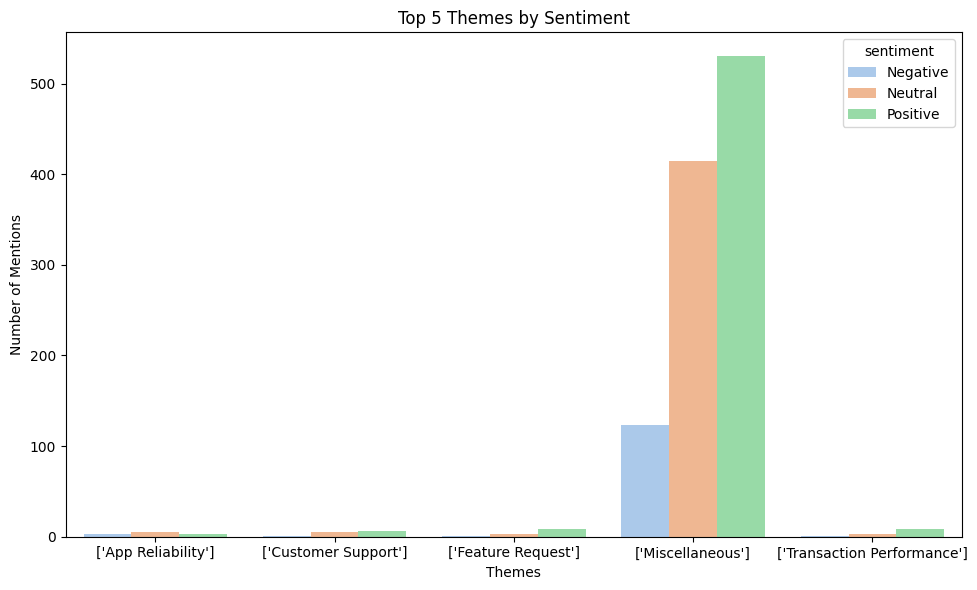

In [16]:
# --- Scenario 4: Top Themes by Sentiment ---
top_themes_sentiment = df.groupby(['themes', 'sentiment']).size().reset_index(name='count')
top_themes = top_themes_sentiment.groupby('themes')['count'].sum().nlargest(5).index.tolist()
filtered = top_themes_sentiment[top_themes_sentiment['themes'].isin(top_themes)]

plt.figure(figsize=(10,6))
sns.barplot(data=filtered, x='themes', y='count', hue='sentiment', palette='pastel')
plt.title("Top 5 Themes by Sentiment")
plt.ylabel("Number of Mentions")
plt.xlabel("Themes")
plt.tight_layout()
plt.show()